<a href="https://colab.research.google.com/github/youseon-jang/Books/blob/main/FashionMNIST_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 케라스로 MNIST 분류 하기

In [ ]:
import keras
from keras.datasets import fashion_mnist

In [ ]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
test_images.shape

(10000, 28, 28)

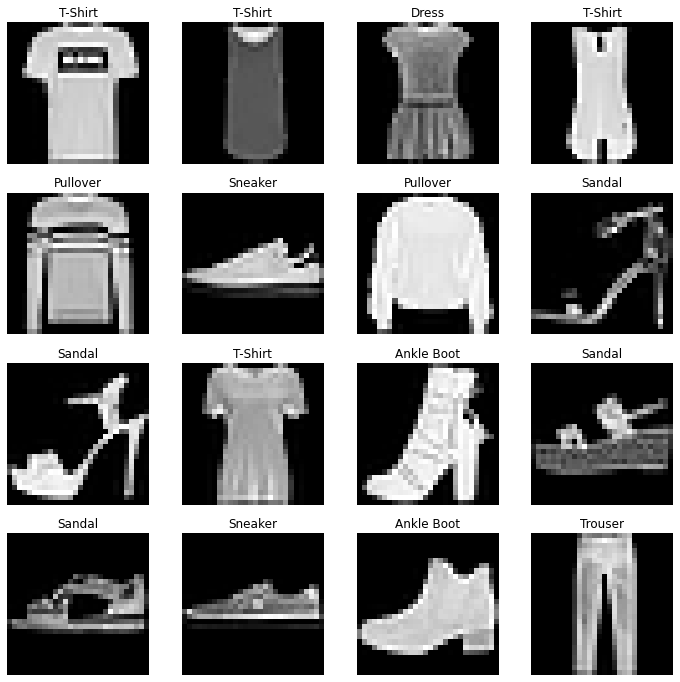

In [ ]:
import matplotlib.pyplot as plt

labels_map = {0:'T-Shirt',
              1:'Trouser',
              2:'Pullover',
              3:'Dress',
              4:'Coat',
              5:'Sandal',
              6:'Shirt',
              7:'Sneaker',
              8:'Bag',
              9:'Ankle Boot',}

figure = plt.figure(figsize = (12, 12))
cols, rows = 4, 4

for i in range(1, cols * rows + 1):
  image = train_images[i].reshape(28, 28)
  label_idx = train_labels[i]
  label = labels_map[label_idx]

  figure.add_subplot(rows, cols, i)
  plt.title(label)
  plt.axis('off')
  plt.imshow(image, cmap = 'gray')

plt.show()

In [ ]:
### 입력 데이터
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

In [ ]:
train_images.shape

(60000, 28, 28, 1)

In [ ]:
from keras.layers.normalization.batch_normalization_v1 import BatchNormalization
from keras.layers.pooling.max_pooling2d import MaxPooling2D
## 모델 만들기
import keras
from keras import Sequential
from keras import layers

model = Sequential()
model.add(layers.Conv2D(32, 3, padding = 'same', activation = 'relu', input_shape = (28, 28, 1)))
model.add(layers.Conv2D(64, 3, padding = 'same', activation = 'relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size = (2, 2)))
model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(128, 3, padding = 'same', activation = 'relu'))
model.add(layers.Conv2D(256, 3, strides = 2, padding = 'same', activation = 'relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size = (2, 2)))
model.add(layers.Dropout(0.3))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation = 'relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dropout(0.3))
model.add(layers.BatchNormalization())
model.add(layers.Dense(10, activation = 'softmax'))

< 다른 방법 >

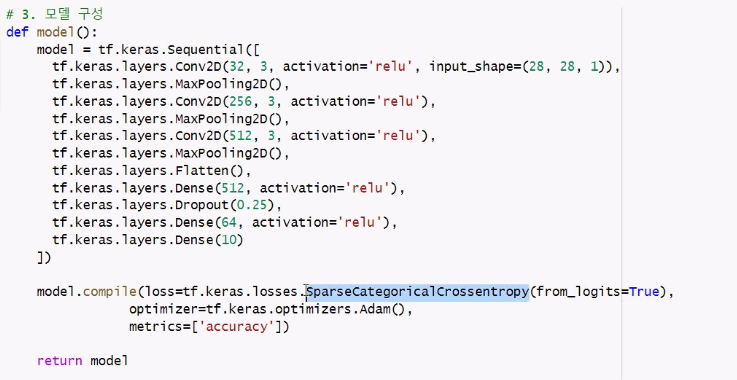

- sparse_categorical_crossentropy : 정수로 된 label을 주면 내부적으로 알아서 loss를 계산

https://peterleeeeee.github.io/categorical_cross_entropy/

In [ ]:
model.compile(optimizer = 'rmsprop',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
model.fit(train_images, train_labels,
          epochs = 30,
          batch_size = 128)

Epoch 1/30
469/469 [==============================] - 3s 7ms/step - loss: 0.5066 - accuracy: 0.8251
Epoch 2/30
469/469 [==============================] - 3s 7ms/step - loss: 0.3013 - accuracy: 0.8953
Epoch 3/30
469/469 [==============================] - 3s 7ms/step - loss: 0.2550 - accuracy: 0.9108
Epoch 4/30
469/469 [==============================] - 3s 7ms/step - loss: 0.2324 - accuracy: 0.9184
Epoch 5/30
469/469 [==============================] - 3s 7ms/step - loss: 0.2125 - accuracy: 0.9257
Epoch 6/30
469/469 [==============================] - 3s 7ms/step - loss: 0.1948 - accuracy: 0.9310
Epoch 7/30
469/469 [==============================] - 3s 7ms/step - loss: 0.1848 - accuracy: 0.9362
Epoch 8/30
469/469 [==============================] - 3s 7ms/step - loss: 0.1740 - accuracy: 0.9389
Epoch 9/30
469/469 [==============================] - 3s 7ms/step - loss: 0.1606 - accuracy: 0.9433
Epoch 10/30
469/469 [==============================] - 3s 7ms/step - loss: 0.1519 - accuracy: 0.9470

In [ ]:
#### 정확도 평가하기
loss, accuracy = model.evaluate(test_images, test_labels)
print(loss, accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.2389 - accuracy: 0.9362
0.2389116883277893 0.9362000226974487


In [ ]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.2446 - accuracy: 0.9229


[0.244600310921669, 0.9229000210762024]

In [ ]:
### 예측하기
import numpy as np

predictions = model.predict(test_images)
print(predictions[0])
print(np.argmax(predictions[0]))

313/313 [==============================] - 1s 2ms/step
[5.1950752e-07 4.4417024e-07 1.4226913e-06 3.2825105e-07 1.6074820e-07
 2.7399467e-06 8.5866270e-07 4.6071468e-06 2.1116533e-07 9.9998868e-01]
9


In [ ]:
len(predictions)

10000